# M5 Data Preprocessing for California Stores Total Sales

This notebook preprocesses the M5 data for VAR study. We shall only consider the total number of units sold for the stores in California. The preprocessed data will be saved in a CSV file for easier loading in the main notebook.

In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
root = os.path.abspath('../m5-data/')
calendar_pth = os.path.join(root, 'calendar.csv')
sales_train_eval_pth = os.path.join(root, 'sales_train_evaluation.csv')
sales_train_val_pth = os.path.join(root, 'sales_train_validation.csv')
sample_submission_pth = os.path.join(root, 'sample_submission.csv')
sell_prices_pth = os.path.join(root, 'sell_prices.csv')

In [49]:
calendar = pd.read_csv(calendar_pth, parse_dates=['date'])
sales_train_eval = pd.read_csv(sales_train_eval_pth)
sales_train_val = pd.read_csv(sales_train_val_pth)
sample_submission = pd.read_csv(sample_submission_pth)
sell_prices = pd.read_csv(sell_prices_pth)

In [50]:
sales_train_val.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [51]:
sales_train_eval.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [52]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [54]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [55]:
sample_submission.tail()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60979,FOODS_3_827_WI_3_evaluation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Preparation for VAR Study

#### Options for doing a VAR study

Let's check the unique data category values

Check unique category IDs

In [56]:
sales_train_eval.cat_id.unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

Check unique store IDs

In [57]:
sales_train_eval.store_id.unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

Check unique department IDs

In [58]:
sales_train_eval.dept_id.unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

Check unique Item IDs

In [59]:
sales_train_eval.item_id.unique(), sales_train_eval.item_id.unique().size

(array(['HOBBIES_1_001', 'HOBBIES_1_002', 'HOBBIES_1_003', ...,
        'FOODS_3_825', 'FOODS_3_826', 'FOODS_3_827'], dtype=object),
 3049)

After a quick inspection of M5 data, we can identify the following as possible options for applying VAR:
- categories
- stores
- stores in the same state
- subdepartment
- subdepartments under the same department (e.g. 'FOODS_1', 'FOODS_2', 'FOODS_3']
- *items* (too many, may be computationally expensive )

In this notebook, we shall only consider the **total number of units sold** for the stores in California. Thus, we will not consider the price of the items. 

#### Study on how to get total values for CA_1 sales

Below we quickly investigate how to get the total sales for the first California store, `CA_1`.

In [60]:
sales_train_eval.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [61]:
# sales data start at the d_1 column
df_ca1 = sales_train_eval[sales_train_eval["store_id"]=='CA_1'].loc[:,'d_1':].T
df_ca1

,0,1,2,3,4,5,6,7,8,9,...,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048
d_1,0,0,0,0,0,0,0,12,2,0,...,0,3,5,0,3,0,1,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,7,2,0,2,0,0,0,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,4,1,0,3,0,5,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,5,5,0,5,0,0,0,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,8,3,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,0,0,0,1,0,0,1,5,0,1,...,2,2,2,0,3,2,0,2,3,5
d_1938,3,0,2,3,0,0,0,4,0,1,...,1,1,2,2,4,4,3,0,0,7
d_1939,3,0,3,0,2,5,1,1,0,0,...,3,4,2,2,1,3,0,3,1,2
d_1940,0,0,0,2,1,2,1,40,1,0,...,1,2,2,1,5,4,0,0,2,10


In [62]:
# sum up the sales for each day
df_ca1['total'] = df_ca1.apply(np.sum, axis=1)
df_ca1

,0,1,2,3,4,5,6,7,8,9,...,3040,3041,3042,3043,3044,3045,3046,3047,3048,total
d_1,0,0,0,0,0,0,0,12,2,0,...,3,5,0,3,0,1,0,0,0,4337
d_2,0,0,0,0,0,0,0,15,0,0,...,7,2,0,2,0,0,0,0,0,4155
d_3,0,0,0,0,0,0,0,0,7,1,...,4,1,0,3,0,5,0,0,0,2816
d_4,0,0,0,0,0,0,0,0,3,0,...,5,5,0,5,0,0,0,0,0,3051
d_5,0,0,0,0,0,0,0,0,0,0,...,8,3,0,1,0,0,0,0,0,2630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,0,0,0,1,0,0,1,5,0,1,...,2,2,0,3,2,0,2,3,5,3995
d_1938,3,0,2,3,0,0,0,4,0,1,...,1,2,2,4,4,3,0,0,7,4136
d_1939,3,0,3,0,2,5,1,1,0,0,...,4,2,2,1,3,0,3,1,2,4433
d_1940,0,0,0,2,1,2,1,40,1,0,...,2,2,1,5,4,0,0,2,10,5764


In [63]:
df_ca1.reset_index(inplace=True)
df_ca1.rename(columns={'index':'d'}, inplace=True)
df_ca1.head(2)

,d,0,1,2,3,4,5,6,7,8,...,3040,3041,3042,3043,3044,3045,3046,3047,3048,total
0,d_1,0,0,0,0,0,0,0,12,2,...,3,5,0,3,0,1,0,0,0,4337
1,d_2,0,0,0,0,0,0,0,15,0,...,7,2,0,2,0,0,0,0,0,4155


<AxesSubplot:>

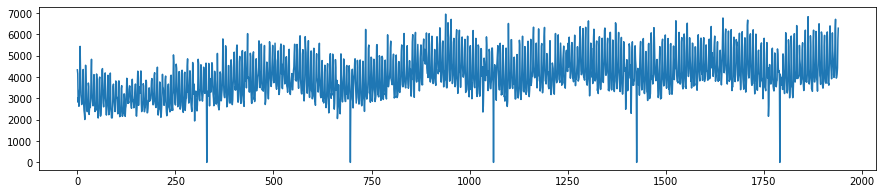

In [64]:
df_ca1['total'].plot(figsize=(15,3))

#### Utility functions for getting and plotting total sales 

Let's define a utility function for getting the total sales from the M5 data

In [75]:
def m5_get_total_sales(column_name, column_values):
    """ Returns dictionary of total sold units under column_name, 
        with keys corresponding to column_values.
        E.g. 
        If column_name = store_id and column_values = ['CA_1', 'CA_2', 'CA_3', 'CA_4']
        return a dictionary where 
            keys are 'CA_1', 'CA_2', 'CA_3', 'CA_4'
            values are total units for sales_train_eval.store_id=='CA_1', 
              sales_train_eval.store_id=='CA_2', etc.
    """
    total_sales_dict = {}
    for v in column_values:
        df_temp = sales_train_eval[sales_train_eval[column_name]==v].loc[:,'d_1':].T
        total_sales_dict[v] = df_temp.apply(np.sum, axis=1)
    return pd.DataFrame(total_sales_dict)

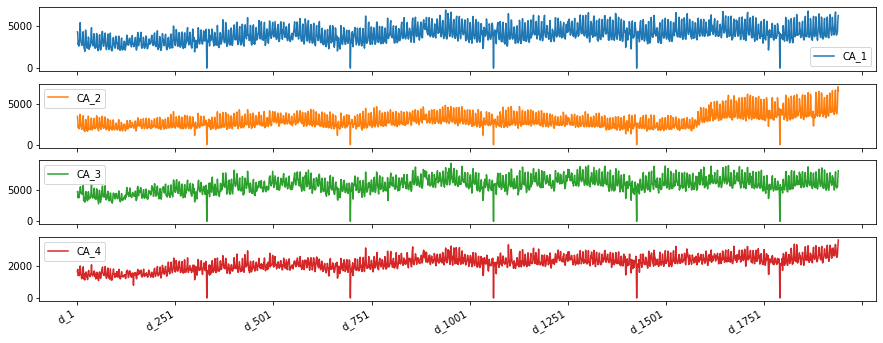

In [76]:
pd.DataFrame(CA_stores_sales).plot(subplots=True, figsize=(15,6));

## Data Preparation and EDA

#### Convert total sales dictionary to dataframe 

In [81]:
df_ca = pd.DataFrame(CA_stores_sales).reset_index().rename(columns={'index':'d'})
df_ca.head()

,d,CA_1,CA_2,CA_3,CA_4
0,d_1,4337,3494,4739,1625
1,d_2,4155,3046,4827,1777
2,d_3,2816,2121,3785,1386
3,d_4,3051,2324,4232,1440
4,d_5,2630,1942,3817,1536


#### Merge with calendar to get the date values

In [82]:
df_ca = df_ca.merge(calendar[['d', 'date']]).drop('d', axis=1).set_index('date')
df_ca.head()

,CA_1,CA_2,CA_3,CA_4
date,,,,
2011-01-29,4337,3494,4739,1625
2011-01-30,4155,3046,4827,1777
2011-01-31,2816,2121,3785,1386
2011-02-01,3051,2324,4232,1440
2011-02-02,2630,1942,3817,1536


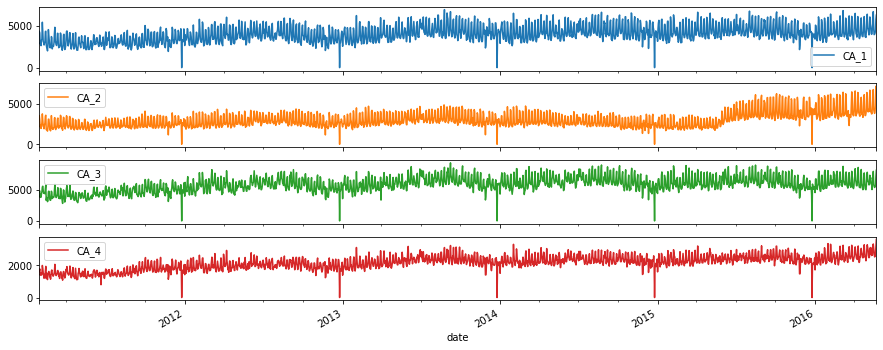

In [83]:
df_ca.plot(subplots=True, figsize=(15,6));

#### Handle outliers

In [84]:
df_ca[df_ca<100].dropna()

,CA_1,CA_2,CA_3,CA_4
date,,,,
2011-12-25,0.0,7.0,1.0,0.0
2012-12-25,0.0,2.0,4.0,0.0
2013-12-25,0.0,2.0,3.0,0.0
2014-12-25,0.0,6.0,0.0,0.0
2015-12-25,0.0,2.0,4.0,0.0


Set values less than 100 to np.nan

In [85]:
df_ca[df_ca<100] = np.nan

In [86]:
df_ca[df_ca<100].dropna()

,CA_1,CA_2,CA_3,CA_4
date,,,,


#### Interpolate nan values

In [87]:
df_ca = df_ca.interpolate()

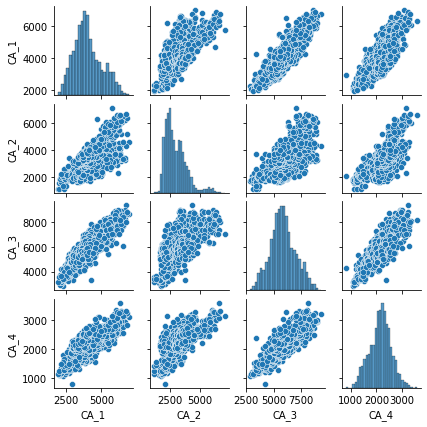

In [88]:
sns.pairplot(df_ca, height=1.5)

#### Replot

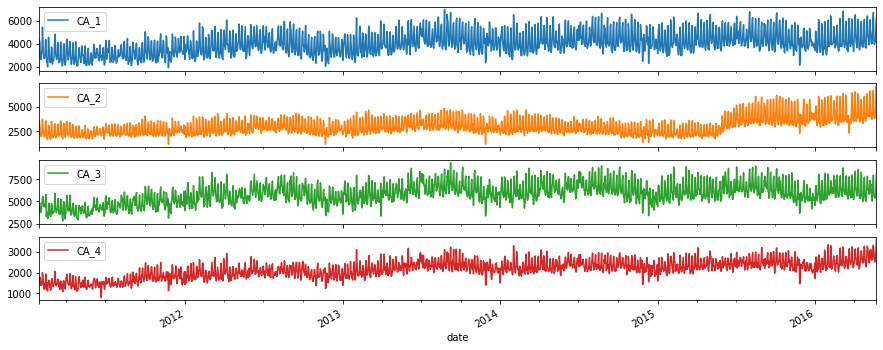

In [90]:
df_ca.plot(subplots=True, figsize=(15,6));

#### Save dataframe to a CSV file

In [92]:
df_ca.to_csv('../m5-data/m5-CA-stores-total-sales.csv')

Read CSV file to verify

In [97]:
pd.read_csv?

In [98]:
temp_df = pd.read_csv('../m5-data/m5-CA-stores-total-sales.csv', index_col=0)
temp_df

,CA_1,CA_2,CA_3,CA_4
date,,,,
2011-01-29,4337.0,3494.0,4739.0,1625.0
2011-01-30,4155.0,3046.0,4827.0,1777.0
2011-01-31,2816.0,2121.0,3785.0,1386.0
2011-02-01,3051.0,2324.0,4232.0,1440.0
2011-02-02,2630.0,1942.0,3817.0,1536.0
...,...,...,...,...
2016-05-18,3995.0,3789.0,5375.0,2519.0
2016-05-19,4136.0,4037.0,5580.0,2544.0
2016-05-20,4433.0,4751.0,5542.0,2704.0


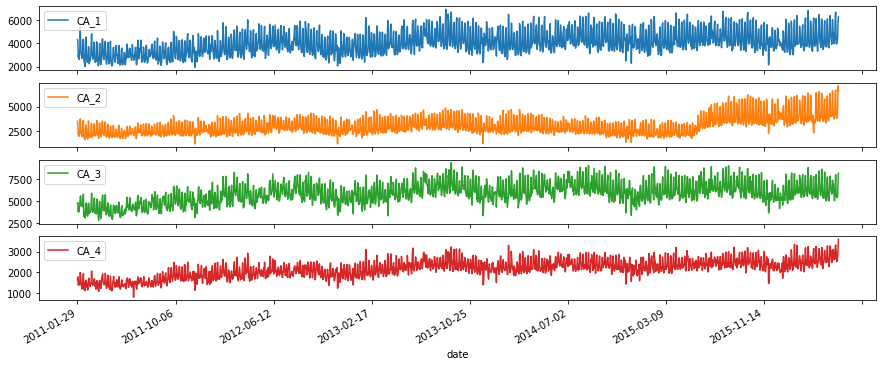

In [102]:
temp_df.plot(subplots=True, figsize=(15,6));